# Decision Trees: Earthquakes and Tsunamis example

In this Jupyter notebook, we will do an exercise using a Decision Tree algorithm.
The aim of this notebook is to give a simple example of how to employ this library and method.
The usage of this algorithm is mainly for pedagogical purposes and it is not looking to thoroughly explain the origin of tsunamis, nor draw precise conclusions.

In [35]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

#### The data for this example is given by the Earthquake data from National Geophysical Data Center / World Data Service (NGDC/WDS): NCEI/WDS Global Significant Earthquake Database. NOAA National Centers for Environmental Information. doi:10.7289/V5TD9V7K

This tsv file was obtained for earthquakes with Magnitude and Damage recorded from all over the world:

https://www.ngdc.noaa.gov/hazel/view/hazards/earthquake/event-data?minEqDepth=0&minEqMagnitude=0&minDamageAmountOrder=0

In [36]:
df_earthquake = pd.read_csv('sismos.tsv', sep='\t')
df_earthquake.head()


,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,"[""Earthquake Magnitude >= 0"",""Earthquake Depth...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN: W,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,NaN,-250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KYRGYZSTAN: CHIGUCHIN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,NaN,-227.0,NaN,NaN,NaN,NaN,NaN,3092.0,NaN,GREECE: DODECANESE ISLANDS,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-63.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,RUSSIA: PANTIKAPEY,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


#### Let's delete the 'Search Parameters' column and the first empty row

In [37]:
df_earthquake = df_earthquake.drop(0)
df_earthquake = df_earthquake.drop(labels='Search Parameters', axis=1)
df_earthquake.head()

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
1,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN: W,38.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,-250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KYRGYZSTAN: CHIGUCHIN,42.7,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,-227.0,NaN,NaN,NaN,NaN,NaN,3092.0,NaN,GREECE: DODECANESE ISLANDS,36.3,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,-63.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,RUSSIA: PANTIKAPEY,45.2,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,10.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,TURKMENISTAN: NISA,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### We will be using only the earthquakes data for which the latitude and longitude are known

In [39]:
df = df_earthquake.dropna(subset=['Latitude','Longitude','Mag','Total Damage Description']).copy() 


### The number given in the column 'Tsu' corresponds to the bulletin number for the tsunami report. 

### Since we are only looking to determine whether the earthquake triggered a tsunami or not, we will replace any number with 1 and NaN with 0

In [40]:
#Getting the indices that are not NaN
indices=df.Tsu.notna()
#Replacing them with 1
df.loc[indices, 'Tsu'] = 1
#Replacing Nan with 0
df.Tsu.fillna(0, inplace=True)



In [41]:
df.head(3)

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
1,-2000.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,TURKMENISTAN: W,38.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,-250.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,KYRGYZSTAN: CHIGUCHIN,42.7,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,-227.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,GREECE: DODECANESE ISLANDS,36.3,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN


## The next step it's to see if it is possible to predict the "Tsu" column with a Decision Tree algorithm. 

#### This would mean to predict if there is a Tsunami report given the columns Latitude, Longitude, Magnitude, Focal Depth and Total Damage Description for an earthquake. 


### Let's see what does these selected features mean:

### Tsu (Tsunami)
When a tsunami or seiche was generated by an earthquake

### Latitude, Longitude
These two features gives the location of the earthquake

### Magnitude (Mag) and Focal Depth (km)
The column Mag contains the primary earthquake magnitude. Magnitude measures the energy released at the source of the earthquake. Magnitude is determined from measurements on seismographs.

Focal Depth is given in km and refers to the depth of the earthquake.


### Total Damage Description
For those events not offering a monetary evaluation of damage, the following five-level scale was used to classify damage (1990 dollars) and was listed in the Damage column. If the actual dollar amount of damage was listed, a descriptor was also added for search purposes.

0->NONE


1->LIMITED (roughly corresponding to less than $1 million)


2->MODERATE (~$1 to $5 million)


3->SEVERE (~$5 to $25 million)


4->EXTREME (~$25 million or more)

When possible, a rough estimate was made of the dollar amount of damage based upon the description provided, in order to choose the damage category. In many cases, only a single descriptive term was available. These terms were converted to the damage categories based upon the authors apparent use of the term elsewhere. In the absence of other information, LIMITED is considered synonymous with slight, minor, and light, SEVERE as synonymous with major, extensive, and heavy, and EXTREME as synonymous with catastrophic.

Note: The descriptive terms relate approximately to current dollar values.

## Now, let's divide the data:
    X as the Features 
  
    y as the response vector (target)


In [42]:
X = df[['Latitude','Longitude','Mag','Total Damage Description','Focal Depth (km)']].values


In [43]:
y = df['Tsu']


### We divide the data into training and test sets

In [44]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, random_state=3)


#### We will create an instance of the DecisionTreeClassifier, with criterion="entropy"

In [45]:
TsuTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
TsuTree

DecisionTreeClassifier(criterion='entropy', max_depth=3)

#### Now let's train the model given the trained data and compute its predictions

In [46]:
TsuTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [47]:
pTsuTree = TsuTree.predict(X_testset)


### What is the score or accuracy for this model?

In [48]:
acc = metrics.accuracy_score(y_testset, pTsuTree)
acc

0.8032200357781754

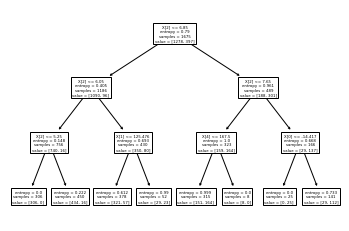

In [49]:
tree.plot_tree(TsuTree)
plt.show()

### Let's obtain the optimal max_depth for this model
#### In our previous example, we have set it to 3, but now let's compute the accuracy of the model for different values of max_depth 

In [50]:
#We choose possible values for max_depth
possiblerange = range(1, 11)

#Now,let's append the variable accuracy for each possible value of max_depth
accuracy = []
for depth in possiblerange:
    
    TreeD = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 3)
    TreeD.fit(X_trainset, y_trainset)    
    score = TreeD.score(X_testset, y_testset)
    accuracy.append(score)

### A plot is an easy way to visualise the best value for max_depth

Text(0.5, 1.0, 'Max_depth vs accuracy')

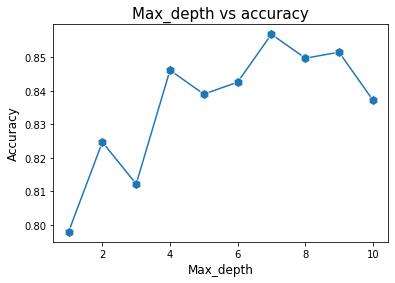

In [51]:
sns.lineplot(x=possiblerange,y=accuracy, marker= 'h', markersize=10)
plt.xlabel("Max_depth", fontsize= 12)
plt.ylabel("Accuracy", fontsize= 12)
plt.title("Max_depth vs accuracy", fontsize= 15)

### We can observe that a max_depth of 7 gives the best accuracy, so let's use this value for our model

In [52]:
TsuTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
TsuTree 


DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [54]:
#Fit and train the new model:
TsuTree.fit(X_trainset, y_trainset) 
pTsuTree = TsuTree.predict(X_testset)

### We can check the importance of each one of the features:

Text(0.5, 1.0, 'Features vs Importance')

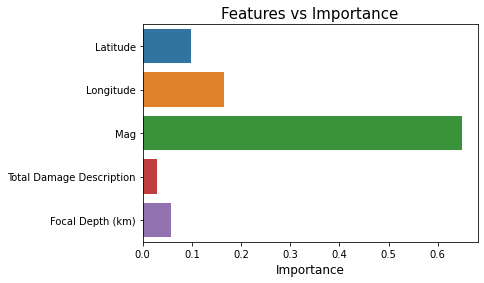

In [58]:
importance = TsuTree.feature_importances_
features=['Latitude','Longitude','Mag','Total Damage Description','Focal Depth (km)']
sns.barplot(x=importance, y=features)
plt.xlabel("Importance", fontsize= 12)
plt.title("Features vs Importance", fontsize= 15)

#### This graph suggests that the magnitude of the earthquake is the most important feature.  This corresponds to what we see in reality, where bigger earthquakes tend to produce tsunamis.

#### Longitude is the second feature in importance. This is to be expected given that most tsunamis occur in the Pacific Ocean.

## Finally, let's visualise our Decision Tree

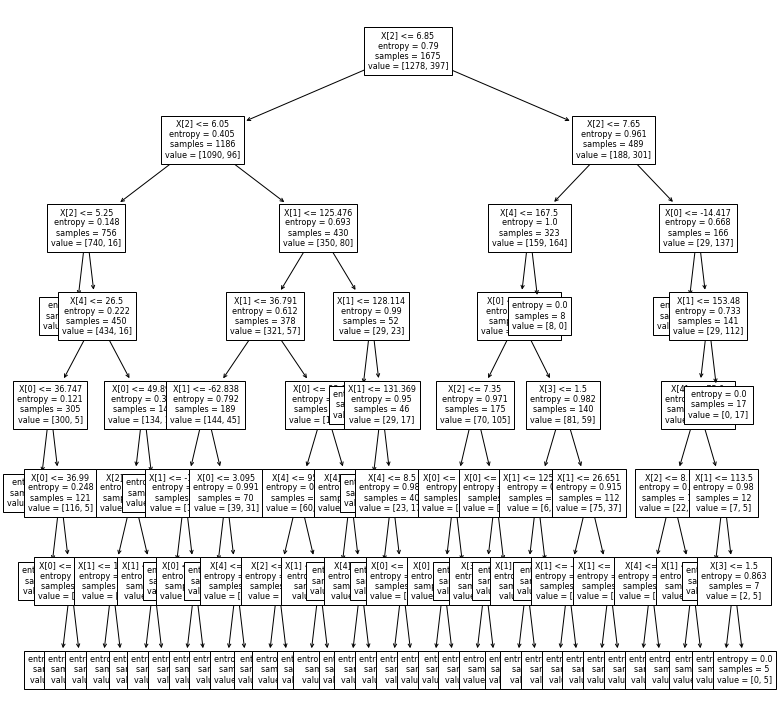

In [59]:

plt.figure(figsize=(13,13))  
tree.plot_tree(TsuTree, fontsize=8)
plt.show()